In [8]:
import numpy as np
import pandas as pd

In [63]:
queen_train_path = "../feature_extraction/MFCCs/train/train_queen.npy"
queenless_train_path = "../feature_extraction/MFCCs/train/train_queenless.npy"
queen_test_path = "../feature_extraction/MFCCs/test/train_queen.npy"
queenless_test_path = "../feature_extraction/MFCCs/test/train_queenless.npy"
queen_val_path = "../feature_extraction/MFCCs/val/train_queen.npy"
queenless_val_path = "../feature_extraction/MFCCs/val/train_queenless.npy"

In [65]:
queen_train = np.load(queen_train_path)
queenless_train = np.load(queenless_train_path)
queen_test = np.load(queen_test_path)
queenless_test = np.load(queenless_test_path)
queen_val = np.load(queen_val_path)
queenless_val = np.load(queenless_val_path)


In [66]:
train_label = pd.DataFrame(np.hstack([[0]*7000, [1]*7000]).T, columns=['labels'])


In [17]:
train_data = pd.DataFrame(np.vstack([queen_train, queenless_train]))



In [18]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-531.931335,136.621933,45.603500,19.686640,6.475194,6.768497,-0.932306,6.658151,3.660365,2.098238,...,-1.125544,-1.165075,-1.149553,-0.725919,-1.299613,-2.185388,-1.711985,-2.563017,-2.332896,-0.816794
1,-536.993347,138.456238,34.898472,20.860229,4.066461,3.119111,-2.870780,0.477826,3.070781,0.220865,...,-3.975086,-1.847926,-2.683721,-2.204340,-2.505154,-2.487367,-3.942400,-3.028254,-2.546824,-3.123504
2,-525.730591,136.192719,36.625347,23.067327,0.258045,4.746896,-0.178224,2.476325,7.398917,3.634185,...,-1.617272,-1.990330,-2.384732,-1.690841,-2.604499,-2.357344,-2.865465,-2.109174,-2.363595,-3.995074
3,-540.449829,139.705780,29.665409,21.128056,3.132750,0.994988,0.255035,-0.820775,1.864982,0.350622,...,-1.872397,-3.000985,-2.445060,-1.332546,-1.202672,-3.304306,-3.232502,-3.766506,-1.886172,-0.477638
4,-543.696594,144.002136,36.112610,24.168007,2.962288,3.031038,-5.003596,1.735093,2.667939,1.482007,...,-2.338263,-2.026209,-1.522658,-1.356268,-3.391201,-3.495290,-3.431026,-2.688978,-2.042050,-2.024219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,-586.455139,137.282516,34.373566,17.421253,10.941988,4.078198,11.242457,5.941251,6.012725,8.022065,...,-2.199062,-0.952318,-3.248278,-1.025418,-3.406041,-3.289362,-3.360293,-1.042379,-2.694039,-2.559495
13996,-572.707092,143.127991,32.171494,18.097290,9.731588,5.532512,8.742662,3.005665,5.201865,7.527236,...,-4.321778,-4.472819,-4.278044,-2.627927,-4.608916,-3.992108,-4.026567,-3.014031,-1.732280,-1.768095
13997,-579.057922,134.726349,32.156475,19.218019,5.755665,3.477601,12.935046,6.404186,5.639282,6.843115,...,-3.719555,-3.296438,-5.588909,-1.397112,-3.187705,-4.040109,-2.637095,-0.487924,-1.255090,-1.443266
13998,-578.548889,141.396133,31.506187,20.068113,6.832242,3.192559,11.349093,4.352320,4.009240,5.281808,...,-1.747524,-0.610173,-1.844640,-2.055688,-5.066210,-4.044204,-3.358748,-2.315694,-2.795509,-3.881965


In [38]:
queenless_test.shape

(2000, 80)

In [67]:
test_label = pd.DataFrame(np.hstack([[0]*3000, [1]*3000]).T, columns=['labels'])
test_data = pd.DataFrame(np.vstack([queen_test, queen_val, queenless_test, queenless_val]))



In [68]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_data)

In [70]:
X_test_scaled = scaler.transform(test_data)

In [112]:
X_scaled

array([[-0.20656753, -1.05254159,  1.80653149, ..., -0.68301314,
        -0.74695635, -0.27276279],
       [-0.28666657, -0.89583887,  0.62970205, ..., -0.93924448,
        -0.86580506, -1.43141469],
       [-0.10844967, -1.08920894,  0.81954159, ..., -0.43305685,
        -0.76401171, -1.86920085],
       ...,
       [-0.95227791, -1.21447935,  0.32826777, ...,  0.45985337,
        -0.14817673, -0.58743748],
       [-0.94422319, -0.64468669,  0.25678009, ..., -0.54679866,
        -1.00396283, -1.81238646],
       [-1.04496897, -1.09106518,  0.24471263, ...,  0.52187005,
        -0.0983346 , -0.43835682]])

In [109]:
import time
t1 = time.time()
clf = SVC(kernel = 'rbf', probability=True)

clf.fit(X_scaled, np.array(train_label).ravel())
t2 = time.time()

In [110]:
print(f"time elapsed: {t2-t1} seconds or {int((t2-t1)//60)} minutes and {int((t2-t1)-(t2-t1)//60*60)} seconds")

time elapsed: 17.227925539016724 seconds or 0 minutes and 17 seconds


In [72]:
print(accuracy_score(test_label,clf.predict(X_test_scaled)))

0.973


In [89]:
print(classification_report(test_label,clf.predict(X_test_scaled), target_names=["Queen", "Queenless"]))

              precision    recall  f1-score   support

       Queen       0.96      0.98      0.97      3000
   Queenless       0.98      0.96      0.97      3000

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



In [73]:
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay


In [75]:
roc_curve(test_label,clf.predict(X_test_scaled))

(array([0.   , 0.017, 1.   ]), array([0.   , 0.963, 1.   ]), array([2, 1, 0]))

In [85]:
import matplotlib.pyplot as plt

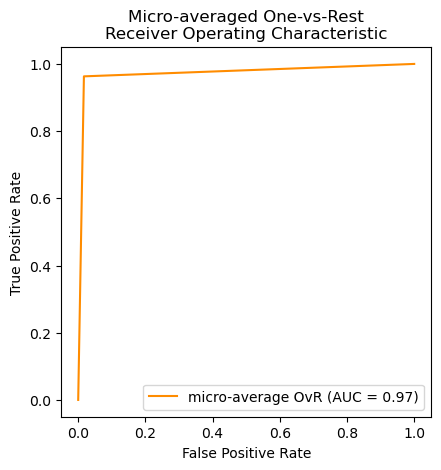

In [87]:
RocCurveDisplay.from_predictions(
    np.array(test_label.values).ravel(),
    np.array(clf.predict(X_test_scaled)).ravel(),
    name="micro-average OvR",
    color="darkorange",

)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

In [90]:
from sklearn.metrics import confusion_matrix

In [97]:
df_cm/df_cm.sum()

,Queen,Queenless
Queen,0.963725,0.017347
Queenless,0.036275,0.982653


<Axes: >

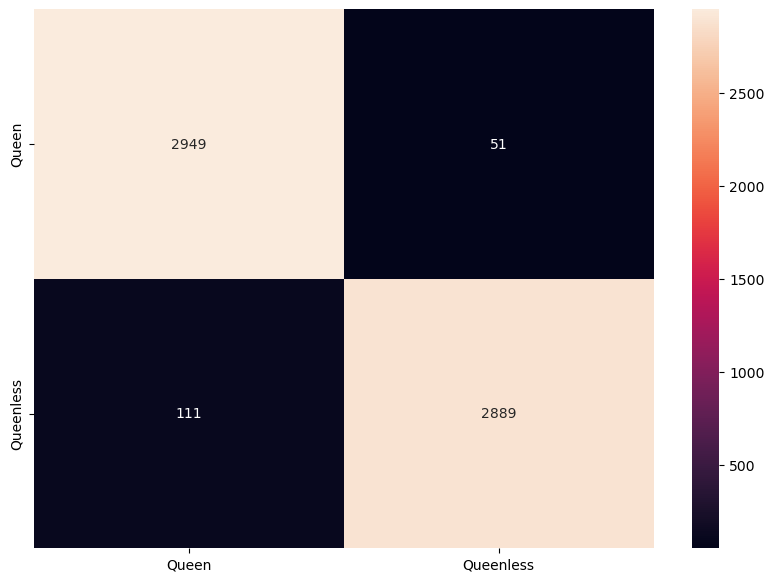

In [95]:
import seaborn as sns

cf_mat = confusion_matrix(test_label, clf.predict(X_test_scaled))
df_cm = pd.DataFrame(cf_mat, index = [i for i in ['Queen', 'Queenless']],
                  columns = [i for i in ['Queen', 'Queenless']])
df_cm_normed = df_cm/df_cm.sum()
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="", )


<Axes: >

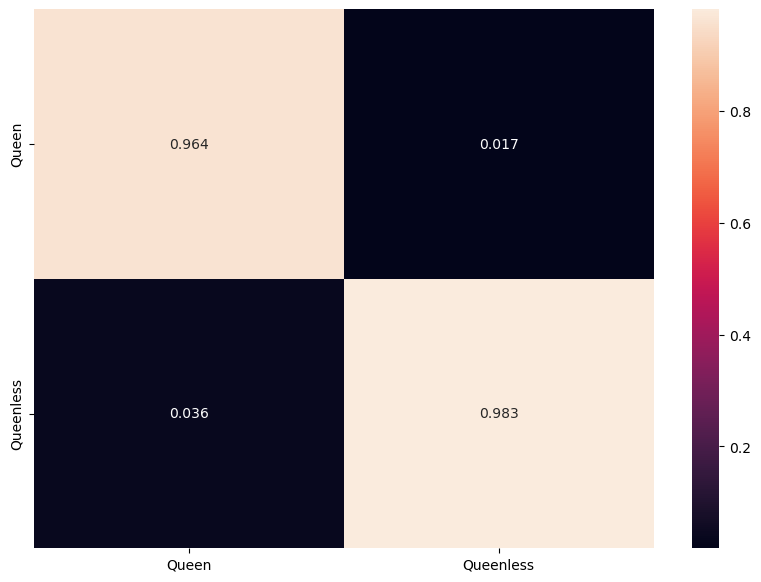

In [106]:
df_cm_normed = df_cm/df_cm.sum()
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_normed, annot=True, fmt=".3f", )